In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os, sys

### preamble 
# Get the current script's directory
current_dir = os.path.dirname(os.path.abspath('DemoForDataAnalysis.ipynb'))
# Get the parent directory by going one level up
parent_dir = os.path.dirname(current_dir)
top_parent_dir = os.path.dirname(parent_dir)
# Add the parent directory to sys.path
sys.path.append(top_parent_dir)

from uwpchem461 import Opener, Analyse

# Make "instances" of the modules Opener and Analyse
opener = Opener()
analyse = Analyse()
help(opener.getdata)

Help on method getdata in module uwpchem461:

getdata(dnfn) method of uwpchem461.Opener instance
    method to read text/csv data using pandas' package
    Input:
    dnfn - string, path to file
    Output:
    data - array, data array



In [2]:
# Experiment 42
# The first line of code assumes that the relevant data are in a file named exp42_dataset.csv, 
# which is stored in the folder called Data, which is in turn stored in the folder called uwpchem.

dataset_exp42 = opener.getdata('exp42_dataset.csv')
wavenumbers = dataset_exp42[1:, 0].astype(float)   # Data for wavenumber are in the 1st column
                                                   # Units of wavenumbers are 1/cm
transmission = dataset_exp42[1:, 1].astype(float)  # Data for transmission are in the 2nd column
                                                   # Units of transmission are percent



In [3]:
help(analyse.getbase)

Help on method getbase in module uwpchem461:

getbase(ds, hibar, nfitpts=30, adjust=25) method of uwpchem461.Analyse instance
    determine a baseline from experiment 42 data
    Input:
    ds - n by 2 array, data of absorbance vs wavenumber
    hibar - scalar, height-value below which a baseline is interpolated
    nfitpts - scalar, number of points used to interpolate a baseline
    Output:
    baseline = n by 1 array



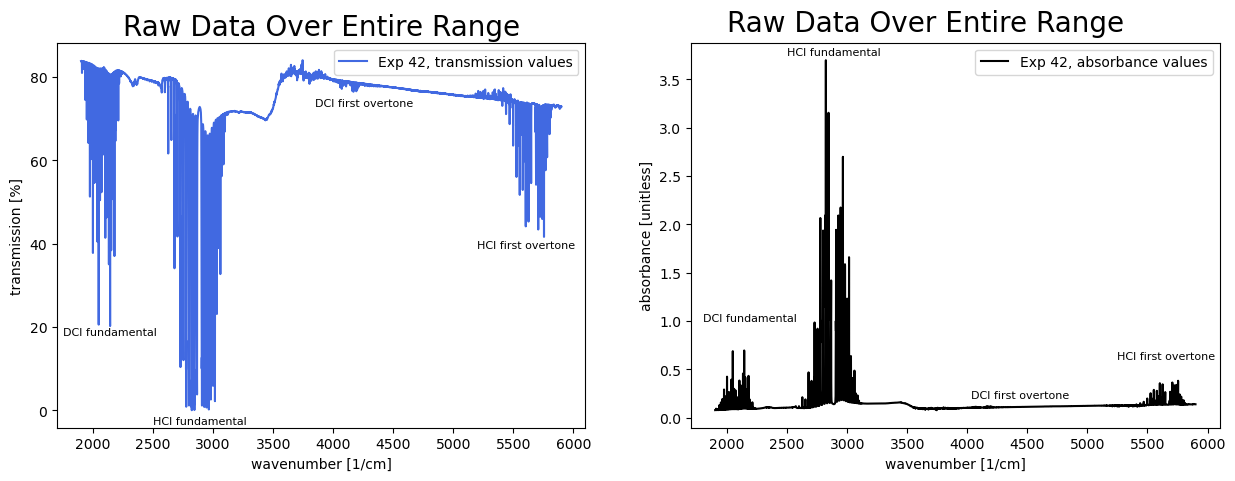

In [4]:
# convert transmittance to absorbance
absorbances = -np.log10(transmission/100)
# Figure 1
# Two-panel graph: transmission vs wavenumber and absorbance vs wavenumber
# The line of code below says the two panels should be plotted in one row
# and in two columns, where the size of the whole figure is 15 wide and 5 tall.
figure1, axis1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting the dataset for transmission vs wavenumber
axis1[0].plot(wavenumbers, transmission, linestyle='solid',
         marker='None', color='royalblue', label='Exp 42, transmission values')
axis1[0].set_xlabel('wavenumber [1/cm]')
axis1[0].set_ylabel('transmission [%]')
axis1[0].text(2500, -3.3, 'HCl fundamental', dict(size=8))
axis1[0].text(5200, 39, 'HCl first overtone', dict(size=8))
axis1[0].text(1750, 18, 'DCl fundamental', dict(size=8))
axis1[0].text(3850, 73, 'DCl first overtone', dict(size=8))
axis1[0].text(2250, 90, 'Raw Data Over Entire Range', dict(size=20))
axis1[0].legend()

# Plotting the dataset for absorbance vs wavenumber
axis1[1].plot(wavenumbers, absorbances, linestyle='solid',
         marker='None', color='black', label='Exp 42, absorbance values')
axis1[1].set_xlabel('wavenumber [1/cm]')
axis1[1].set_ylabel('absorbance [unitless]')
axis1[1].text(2500, 3.75, 'HCl fundamental', dict(size=8))
axis1[1].text(5250, 0.6, 'HCl first overtone', dict(size=8))
axis1[1].text(1800, 1, 'DCl fundamental', dict(size=8))
axis1[1].text(4030, 0.2, 'DCl first overtone', dict(size=8))
axis1[1].text(2000, 4.0, 'Raw Data Over Entire Range', dict(size=20))
axis1[1].legend()

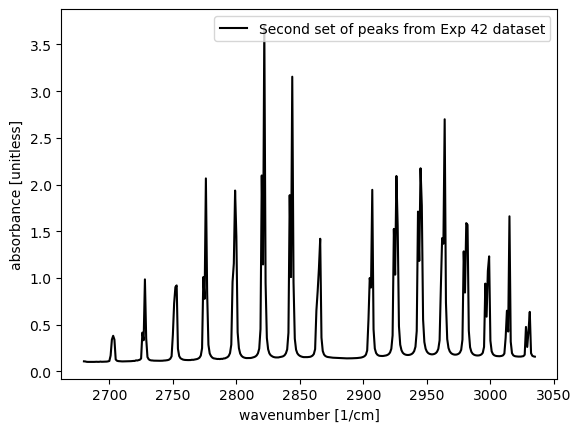

In [5]:
# The lines of code below crop the data in Figure 1 to leave only a single set of peaks
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!

index_set1 = np.where((wavenumbers >= 2680) & (wavenumbers <= 3035))[0]
     # Line 1 finds the indexes of the points that have wavenumbers between 2575 and 3175 cm^-1.
wavenumbers_set1 = wavenumbers[index_set1]
     # Line 2 saves a list of wavenumbers with those indexes in a new array called wavenumbers_set2
absorbances_set1 = absorbances[index_set1]
     # Line 2 saves a list of absorbances with those indexes in a new array called absorbances_set2
# Figure 2: Graph of absorbance vs wavenumber for the cropped data
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!
figure2, axis2 = plt.subplots()

# Plotting the cropped dataset for absorbance vs wavenumber
axis2.plot(wavenumbers_set1, absorbances_set1, linestyle='solid',
         marker='None', color='black', label='Second set of peaks from Exp 42 dataset')
axis2.set_xlabel('wavenumber [1/cm]')
axis2.set_ylabel('absorbance [unitless]')
axis2.legend()

[3031. 3028. 3015. 3013. 2999. 2996. 2981. 2979. 2964. 2962. 2945. 2943.
 2926. 2924. 2907. 2905. 2866. 2844. 2842. 2822. 2820. 2799. 2776. 2774.
 2753. 2728. 2726. 2703.]
[0.63582437 0.47456645 1.65955589 0.64820369 1.23062267 0.93854752
 1.58670024 1.28399666 2.69897    1.42596873 2.1739252  1.70996539
 2.09151498 1.52432881 1.94309515 0.99869907 1.41907502 3.15490196
 1.88605665 3.69897    2.09691001 1.93554201 2.06550155 1.00921731
 0.91937351 0.98380265 0.41386297 0.37955162]


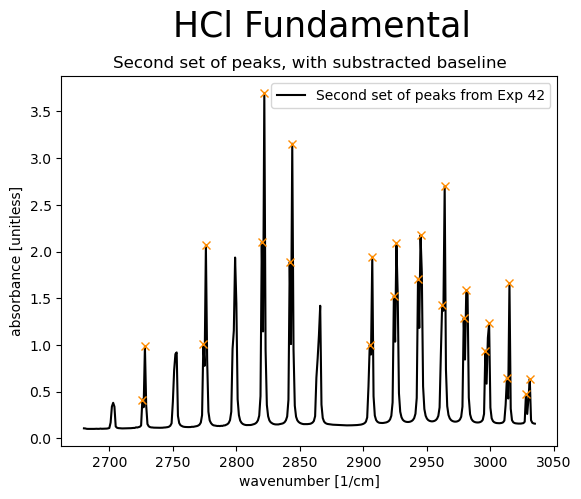

In [6]:
# The line code below puts the indexes of the peaks in an array called indexes_set2_peaks
indexes_set1_peaks, _ = sp.signal.find_peaks(absorbances_set1, height=0.14)
# The code will find peaks only when the y-values are greater than the `height` value specified
# Plot the locations of the peaks over the cropped dataset in the existing Figure 6
# The code below copies all the commands that we previously used to make Figure 6,
# and then appends two new lines at the end to plot the locations of the peaks

figure3, axis3 = plt.subplots()

axis3.plot(wavenumbers_set1, absorbances_set1, linestyle='solid',
         marker='None', color='black', label='Second set of peaks from Exp 42')
axis3.set_xlabel('wavenumber [1/cm]')
axis3.set_ylabel('absorbance [unitless]')
axis3.set_title('Second set of peaks, with substracted baseline')
axis3.legend()
axis3.text(2750, 4.3, 'HCl Fundamental', dict(size=25))
#axis3.plot(wavenumbers_set1[indexes_set1_peaks], 
           #absorbances_set1[indexes_set1_peaks],
          #marker='x', color='darkorange', linestyle='None', label='Individual peaks in the second set')
axis3.legend()


new_wave = wavenumbers_set1[indexes_set1_peaks]
new_abs = absorbances_set1[indexes_set1_peaks]

new_wave = np.delete(new_wave, 16)
new_abs = np.delete(new_abs, 16)

new_wave = np.delete(new_wave, 26)
new_abs = np.delete(new_abs, 26)

new_wave = np.delete(new_wave, 23)
new_abs = np.delete(new_abs, 23)

new_wave = np.delete(new_wave, 20)
new_abs = np.delete(new_abs, 20)

axis3.plot(new_wave, 
           new_abs ,
          marker='x', color='darkorange', linestyle='None', label='Individual peaks in the second set')

print(wavenumbers_set1[indexes_set1_peaks])
print(absorbances_set1[indexes_set1_peaks])



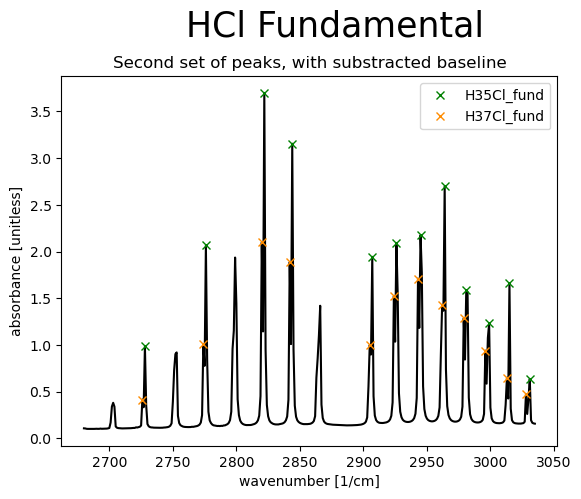

In [7]:
figure4, axis4 = plt.subplots()
axis4.plot(wavenumbers_set1, absorbances_set1, linestyle='solid',
           marker='None', color='black', )
axis4.set_xlabel('wavenumber [1/cm]')
axis4.set_ylabel('absorbance [unitless]')
axis4.set_title('Second set of peaks, with substracted baseline')
even_35_wave, even_35_abs = new_wave[::2], new_abs[::2]
odd_37_wave,  odd_37_abs  = new_wave[1::2], new_abs[1::2]

axis4.plot(even_35_wave, even_35_abs,
           marker='x', color='green', linestyle='None', label='H35Cl_fund')
axis4.plot(odd_37_wave, odd_37_abs,
           marker='x', color='darkorange', linestyle='None', label='H37Cl_fund')
axis4.text(2760, 4.3, 'HCl Fundamental', dict(size=25))
axis4.legend()


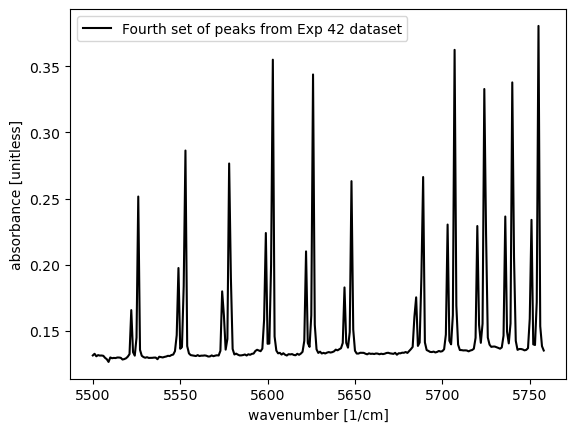

In [8]:
# The lines of code below crop the data in Figure 1 to leave only a single set of peaks
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!

index_set2 = np.where((wavenumbers >= 5500) & (wavenumbers <= 5758))[0]
     # Line 1 finds the indexes of the points that have wavenumbers between 2575 and 3175 cm^-1.
wavenumbers_set2 = wavenumbers[index_set2]
     # Line 2 saves a list of wavenumbers with those indexes in a new array called wavenumbers_set2
absorbances_set2 = absorbances[index_set2]
     # Line 2 saves a list of absorbances with those indexes in a new array called absorbances_set2
# Figure 2: Graph of absorbance vs wavenumber for the cropped data
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!
figure5, axis5 = plt.subplots()

# Plotting the cropped dataset for absorbance vs wavenumber
axis5.plot(wavenumbers_set2, absorbances_set2, linestyle='solid',
         marker='None', color='black', label='Fourth set of peaks from Exp 42 dataset')
axis5.set_xlabel('wavenumber [1/cm]')
axis5.set_ylabel('absorbance [unitless]')
axis5.legend()

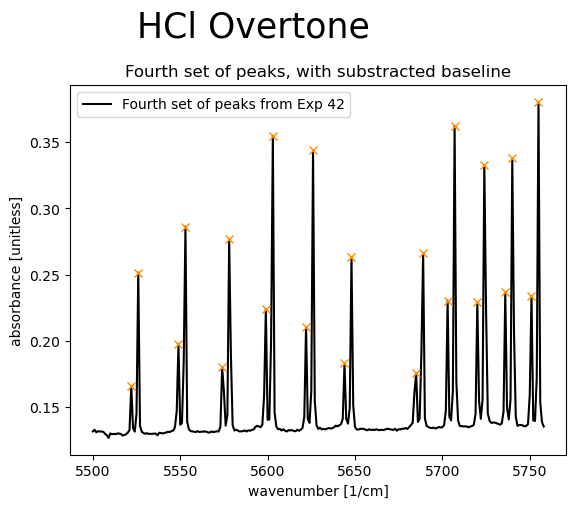

In [9]:
# The line code below puts the indexes of the peaks in an array called indexes_set2_peaks
indexes_set2_peaks, _ = sp.signal.find_peaks(absorbances_set2, height=0.14)
# The code will find peaks only when the y-values are greater than the `height` value specified
# Plot the locations of the peaks over the cropped dataset in the existing Figure 6
# The code below copies all the commands that we previously used to make Figure 6,
# and then appends two new lines at the end to plot the locations of the peaks

figure6, axis6 = plt.subplots()

axis6.plot(wavenumbers_set2, absorbances_set2, linestyle='solid',
         marker='None', color='black', label='Fourth set of peaks from Exp 42')
axis6.set_xlabel('wavenumber [1/cm]')
axis6.set_ylabel('absorbance [unitless]')
axis6.set_title('Fourth set of peaks, with substracted baseline')
axis6.legend()
axis6.text(5525, 0.43, 'HCl Overtone', dict(size=25))
axis6.legend()
axis6.plot(wavenumbers_set2[indexes_set2_peaks], 
           absorbances_set2[indexes_set2_peaks],
          marker='x', color='darkorange', linestyle='None', label='Individual peaks in the fourth set')


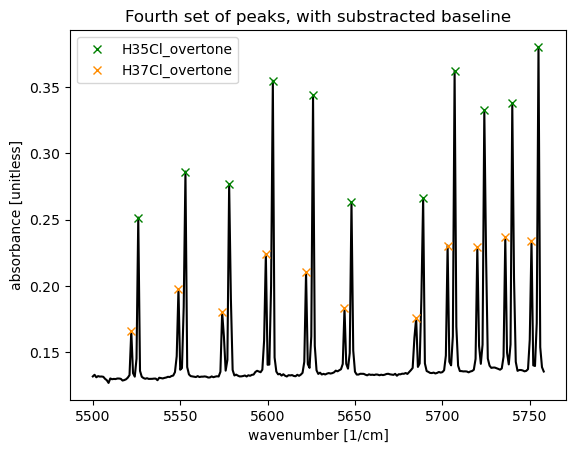

In [10]:
figure6, axis6 = plt.subplots()
axis6.plot(wavenumbers_set2, absorbances_set2, linestyle='solid',
           marker='None', color='black', )
axis6.set_xlabel('wavenumber [1/cm]')
axis6.set_ylabel('absorbance [unitless]')
axis6.set_title('Fourth set of peaks, with substracted baseline')
'''
even_35_wave_over, even_35_abs_over = wavenumbers_set2[::2], wavenumbers_set2[::2]
odd_37_wave_over,  odd_37_abs_over  = absorbances_set2[1::2], absorbances_set2[1::2]

axis6.plot(even_35_wave_over, even_35_abs_over,
           marker='x', color='green', linestyle='None', label='H35Cl_over')
axis6.plot(odd_37_wave_over,  odd_37_abs_over,
           marker='x', color='darkorange', linestyle='None', label='H37Cl_over')
axis6.text(5525, 0.45, 'HCl Overtone', dict(size=25))
axis6.legend()
'''
even_35_wave_over = wavenumbers_set2[indexes_set2_peaks][::2]
even_35_abs_over  = absorbances_set2[indexes_set2_peaks][::2]

odd_37_wave_over  = wavenumbers_set2[indexes_set2_peaks][1::2]
odd_37_abs_over   = absorbances_set2[indexes_set2_peaks][1::2]

axis6.plot(even_35_wave_over, even_35_abs_over,
           marker='x', color='green', linestyle='None',
           label='H35Cl_overtone')

axis6.plot(odd_37_wave_over, odd_37_abs_over,
           marker='x', color='darkorange', linestyle='None',
           label='H37Cl_overtone')
axis6.legend()

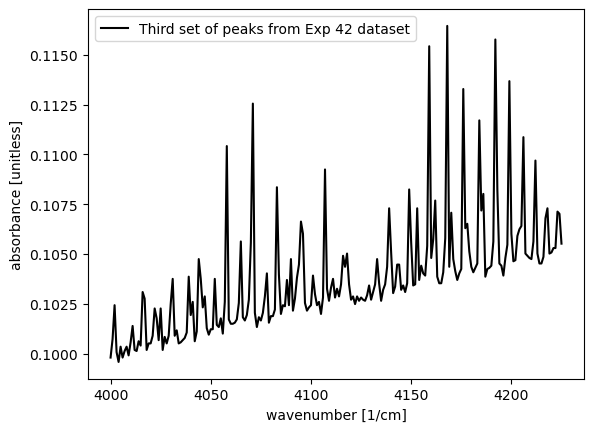

In [11]:
# The lines of code below crop the data in Figure 1 to leave only a single set of peaks
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!

index_set3 = np.where((wavenumbers >= 4000) & (wavenumbers <= 4225))[0]
     # Line 1 finds the indexes of the points that have wavenumbers between 2575 and 3175 cm^-1.
wavenumbers_set3 = wavenumbers[index_set3]
     # Line 2 saves a list of wavenumbers with those indexes in a new array called wavenumbers_set2
absorbances_set3 = absorbances[index_set3]
     # Line 2 saves a list of absorbances with those indexes in a new array called absorbances_set2
# Figure 2: Graph of absorbance vs wavenumber for the cropped data
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!
figure7, axis7 = plt.subplots()

# Plotting the cropped dataset for absorbance vs wavenumber
axis7.plot(wavenumbers_set3, absorbances_set3, linestyle='solid',
         marker='None', color='black', label='Third set of peaks from Exp 42 dataset')
axis7.set_xlabel('wavenumber [1/cm]')
axis7.set_ylabel('absorbance [unitless]')
axis7.legend()

In [ ]:
# Create new array of the dataset with dimensions n x 2, 
# where the x-values are wavenumbers and the y-values are absorbances.
dataset_set3 = [[wavenumber_set3, absorbances_set3[index]]
                      for index, wavenumber_set3 in enumerate(wavenumbers_set3)]
# Define a value called "hibar" that is HIGHER than the troughs between each peak. 
# For your data, a different value of hibar may be relevant!
hibar = 0.04

# Run the method getbase() on the cropped dataset to calculate the baseline for that dataset
baseline_set3 = analyse.getbase(dataset_set3, hibar)
# Plot the baseline over the cropped dataset in the existing Figure 5
figure8, axis8 = plt.subplots()
axis8.plot(wavenumbers_set3, baseline_set3, linestyle='solid',
         marker='None', color='red', label='Baseline')
axis8.legend()